# Training and Evaluating Multiple Models to Find The Best One

## Imports and Installs

Import Libraries

In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

## Cleaning Data

Read and split into features and target

In [ ]:
df_final = pd.read_csv('final_data.csv')

In [ ]:
# Step 1: Handle 'num_rounds' - Replace 'N' with NaN and handle missing values
df_final['num_rounds'] = df_final['num_rounds'].replace('N', np.nan)
df_final['num_rounds'] = pd.to_numeric(df_final['num_rounds'], errors='coerce')  # Convert to numeric

# Fill missing values in 'num_rounds' with the median or drop rows with NaN (depending on the situation)
df_final['num_rounds'].fillna(df_final['num_rounds'].median(), inplace=True)

# Step 2: Handle 'title_fight' - Map 'F' to 0 and 'T' to 1
df_final['title_fight'] = df_final['title_fight'].map({'F': 0, 'T': 1})

# Step 3: Encode 'weight_class' using LabelEncoder
le = LabelEncoder()
df_final['weight_class'] = le.fit_transform(df_final['weight_class'].astype(str))

# After handling these columns, proceed with the rest of the preprocessing and model training steps
df_final.head()

<ipython-input-13-aa1c8d74176c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['num_rounds'].fillna(df_final['num_rounds'].median(), inplace=True)


,winner,strikes_att_diff,strikes_succ_diff,sig_strikes_att_diff,sig_strikes_succ_diff,takedown_att_diff,takedown_succ_diff,submission_att_diff,ctrl_time_diff,fighter_l_name_f1,fighter_l_name_f2,num_rounds,title_fight,weight_class,height_diff,reach_diff,rank_diff,event_name,event_city,event_country
0,1,8.0,-2.0,8.0,-2.0,6.0,1.0,0.0,88.0,Fiziev,Gamrot,5.0,0.0,6,-5.08,2.54,0.0,UFC Fight Night: Fiziev vs. Gamrot,Las Vegas,USA
1,0,17.0,20.0,0.0,7.0,9.0,4.0,1.0,365.0,Mitchell,Ige,3.0,0.0,2,7.62,-2.54,0.0,UFC Fight Night: Fiziev vs. Gamrot,Las Vegas,USA
2,0,13.0,-5.0,15.0,-5.0,-15.0,-5.0,-1.0,-322.0,Rodriguez,Waterson-Gomez,3.0,0.0,13,7.62,7.62,0.0,UFC Fight Night: Fiziev vs. Gamrot,Las Vegas,USA
3,0,58.0,58.0,47.0,52.0,1.0,1.0,0.0,-8.0,Battle,Fletcher,3.0,0.0,9,7.62,25.40,0.0,UFC Fight Night: Fiziev vs. Gamrot,Las Vegas,USA
4,0,-93.0,-74.0,-70.0,-57.0,5.0,0.0,0.0,46.0,Ramos,Jourdain,3.0,0.0,2,0.00,7.62,0.0,UFC Fight Night: Fiziev vs. Gamrot,Las Vegas,USA


In [ ]:
X = df_final.drop(columns=['winner', 'fighter_l_name_f1', 'fighter_l_name_f2', 'event_name', 'event_city', 'event_country'])
y = df_final['winner']

In [ ]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

Split into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

Standaridze the data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regression Model

In [ ]:
print("Training Logistic Regression...")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(classification_report(y_test, y_pred_log_reg))

Training Logistic Regression...
Logistic Regression Accuracy: 0.6454640250260688
              precision    recall  f1-score   support

           0       0.66      0.94      0.78      1876
           1       0.45      0.09      0.15      1001

    accuracy                           0.65      2877
   macro avg       0.56      0.52      0.46      2877
weighted avg       0.59      0.65      0.56      2877



## Random Forest Model

In [ ]:
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Training Random Forest...
Random Forest Accuracy: 0.6965589155370178
              precision    recall  f1-score   support

           0       0.72      0.86      0.79      1876
           1       0.60      0.38      0.47      1001

    accuracy                           0.70      2877
   macro avg       0.66      0.62      0.63      2877
weighted avg       0.68      0.70      0.68      2877



### Finetuning Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


({'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.7104489508881965)

In [ ]:
# After hyperparameter tuning, extract the best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Best Random Forest Model Accuracy:", accuracy_best_rf)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Best Random Forest Model Accuracy: 0.7014250955856796
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      1876
           1       0.62      0.38      0.47      1001

    accuracy                           0.70      2877
   macro avg       0.67      0.63      0.63      2877
weighted avg       0.69      0.70      0.68      2877



In [ ]:
# Retrain Random Forest using the best parameters on the full training set
final_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

final_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:
import joblib

# Save the trained model
joblib.dump(final_rf_model, 'Random Forest Model.pkl')

# Later, load the model when needed
# final_rf_model = joblib.load('final_random_forest_model.pkl')


['Random Forest Model.pkl']

## XGBoost Model

In [ ]:
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy:", accuracy_xgb)

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Model Accuracy: 0.6930830726451165
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1876
           1       0.58      0.44      0.50      1001

    accuracy                           0.69      2877
   macro avg       0.66      0.63      0.64      2877
weighted avg       0.68      0.69      0.68      2877



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

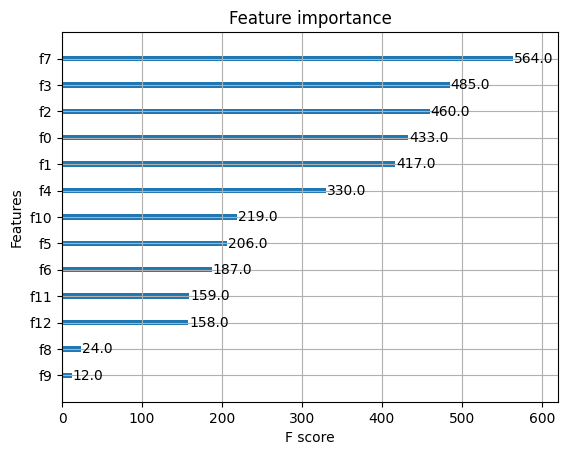

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model)

### Hyperparameter Tuning

Define the Parameter Grid

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate controls how much to update the model with each new tree
    'n_estimators': [100, 200, 300],     # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],              # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],       # Minimum sum of weights of all observations required in a child
    'subsample': [0.8, 1.0],             # Fraction of samples to be used for building each tree
    'colsample_bytree': [0.8, 1.0],      # Fraction of features to be used for building each tree
    'gamma': [0, 0.1, 0.3],              # Minimum loss reduction to make a further partition on a leaf node
}

Initialize the XGBoost classifier

In [ ]:
xgb_model = XGBClassifier(random_state=42)

Initialize GridSearchCV to find the best parameters

In [ ]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

Fit the model with the training data

In [ ]:
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

Get the best parameters and best score from the grid search

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Parameters for XGBoost:", best_params_xgb)
print("Best Accuracy from Grid Search:", best_score_xgb)

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Accuracy from Grid Search: 0.7107101604913334


Evaluate the best model on the test set

In [ ]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

Evaluate the final model

In [ ]:
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Final XGBoost Accuracy on Test Set:", accuracy_best_xgb)

Final XGBoost Accuracy on Test Set: 0.6996871741397289


Classification report

In [ ]:
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79      1876
           1       0.60      0.42      0.49      1001

    accuracy                           0.70      2877
   macro avg       0.67      0.63      0.64      2877
weighted avg       0.69      0.70      0.68      2877



## Other Models

### LightGBM (Light Gradient Boosting Machine)

In [ ]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 3958, number of negative: 7546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1434
[LightGBM] [Info] Number of data points in the train set: 11504, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344054 -> initscore=-0.645279
[LightGBM] [Info] Start training from score -0.645279
LightGBM Accuracy: 0.7038581856100105


### CatBoost

In [ ]:
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))

CatBoost Accuracy: 0.7045533541883907


### SVM (Support Vecotr Machines)

In [ ]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))

SVM Accuracy: 0.6909975669099757


### Multi-layer Perceptron

In [ ]:
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("MLP Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))

MLP Neural Network Accuracy: 0.6976016684045881


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Voting Classifier

In [ ]:
voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
], voting='hard')

voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.6989920055613487


## Stacking Best Models

In [ ]:
base_models = [
    ('lgbm', LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(random_state=42)),
    ('lr', LogisticRegression())
]

meta_model = XGBClassifier()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)

y_pred_stack = stacking_model.predict(X_test)

accuracy_stack = accuracy_score(y_test, y_pred_stack)
print("Stacking Model Accuracy:", accuracy_stack)
print("Classification Report:\n", classification_report(y_test, y_pred_stack))


Streaming output truncated to the last 5000 lines.
15:	learn: 0.6341617	total: 154ms	remaining: 9.48s
16:	learn: 0.6317700	total: 162ms	remaining: 9.38s
17:	learn: 0.6293796	total: 168ms	remaining: 9.16s
18:	learn: 0.6273162	total: 180ms	remaining: 9.29s
19:	learn: 0.6250450	total: 188ms	remaining: 9.2s
20:	learn: 0.6227610	total: 199ms	remaining: 9.26s
21:	learn: 0.6207410	total: 209ms	remaining: 9.3s
22:	learn: 0.6185883	total: 215ms	remaining: 9.12s
23:	learn: 0.6170410	total: 222ms	remaining: 9.05s
24:	learn: 0.6152184	total: 229ms	remaining: 8.93s
25:	learn: 0.6136326	total: 235ms	remaining: 8.8s
26:	learn: 0.6122720	total: 240ms	remaining: 8.66s
27:	learn: 0.6107878	total: 245ms	remaining: 8.52s
28:	learn: 0.6092658	total: 250ms	remaining: 8.38s
29:	learn: 0.6079130	total: 256ms	remaining: 8.27s
30:	learn: 0.6066145	total: 261ms	remaining: 8.17s
31:	learn: 0.6051788	total: 269ms	remaining: 8.13s
32:	learn: 0.6040795	total: 281ms	remaining: 8.23s
33:	learn: 0.6029465	total: 298ms	